# Machine Learning

### Random Forest







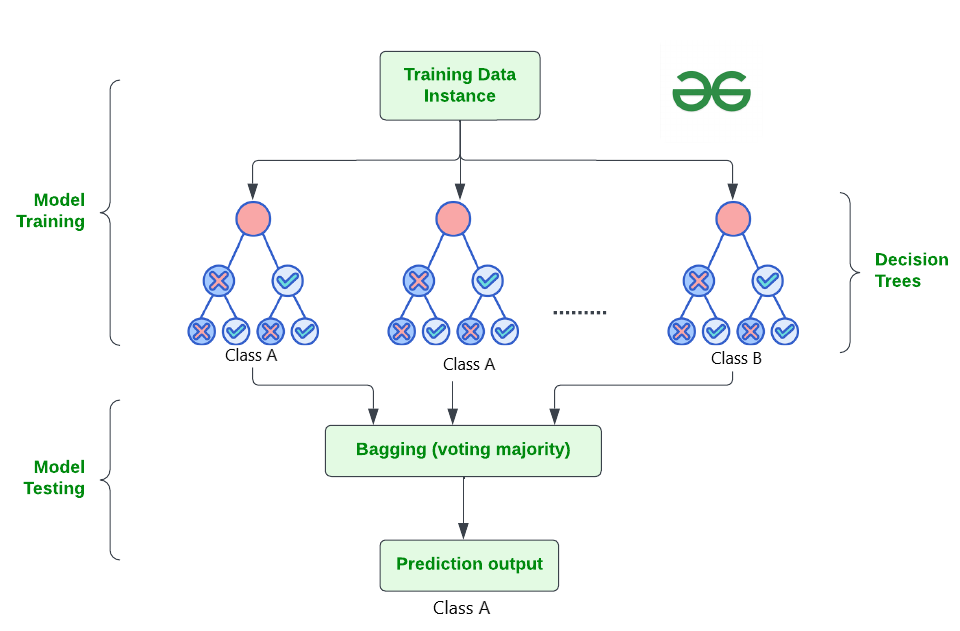

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set.
<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyQt5 
%matplotlib qt

In [3]:
# load data
Data=pd.read_csv("kyphosis.csv")

In [4]:
Data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
Data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
#Exploratory Data Analysis (EDA)
sns.pairplot(Data,hue="Kyphosis",palette="Set1")

In [8]:
# train and test split
from sklearn.model_selection import train_test_split
x=Data.drop(['Kyphosis'],axis=1)
y=Data['Kyphosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [9]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()

# train model
DTmodel.fit(x_train, y_train)

# prediction 
y_pred = DTmodel.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("-"*60)
from sklearn.metrics import confusion_matrix,classification_report
print(f"confusion matrix :\n{confusion_matrix(y_test,y_pred)}")
print("="*20)
print(f"classification report:\n{classification_report(y_test,y_pred)}")
print("-"*60)
print(f"Decision Tree score :{DTmodel.score(x_test,y_test)}")

Accuracy: 59.26%
------------------------------------------------------------
confusion matrix :
[[14  5]
 [ 6  2]]
classification report:
              precision    recall  f1-score   support

      absent       0.70      0.74      0.72        19
     present       0.29      0.25      0.27         8

    accuracy                           0.59        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.58      0.59      0.58        27

------------------------------------------------------------
Decision Tree score :0.5925925925925926


In [10]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

RFmodel =  RandomForestClassifier(n_estimators=200)

# train model
RFmodel.fit(x_train, y_train)

# prediction 
RF_pred = RFmodel.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
accuracyRF = accuracy_score(y_test, RF_pred)
print(f'Accuracy: {accuracyRF * 100:.2f}%')
print("-"*60)


from sklearn.metrics import confusion_matrix,classification_report
print(f"confusion matrix :\n{confusion_matrix(y_test,RF_pred)}")
print("="*20)
print(f"classification report:\n{classification_report(y_test,RF_pred)}")
print("-"*60)
print(f"Random Forest score :{RFmodel.score(x_test,y_test)}")
print("-"*60)
print("-"*60)

RF_eval=pd.DataFrame({"label":y_test,"prediction":RF_pred})
print("evaluation:\n",RF_eval)

Accuracy: 77.78%
------------------------------------------------------------
confusion matrix :
[[19  0]
 [ 6  2]]
classification report:
              precision    recall  f1-score   support

      absent       0.76      1.00      0.86        19
     present       1.00      0.25      0.40         8

    accuracy                           0.78        27
   macro avg       0.88      0.62      0.63        27
weighted avg       0.83      0.78      0.73        27

------------------------------------------------------------
Random Forest score :0.7777777777777778
------------------------------------------------------------
------------------------------------------------------------
evaluation:
       label prediction
33   absent     absent
61  present    present
21  present    present
32   absent     absent
20   absent     absent
13   absent     absent
52  present     absent
25   absent     absent
22  present     absent
27   absent     absent
30   absent     absent
2   present     absent

In [11]:
Data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [12]:
# Feature importance
feature_importances = RFmodel.feature_importances_
importance_df = pd.DataFrame({'feature': x.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)
importance_df


,feature,importance
0,Age,0.432704
2,Start,0.341901
1,Number,0.225395


In [14]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances in Random Forest')
plt.show()

تمرین
<br>
این دیتاست مربوط به یک بنگاه مالی (مرکز اعتباری) است . یک بازار دووجهی است مانند سایت دیوار که خریدار وفروشنده همدیگر را پیدا میکنند. در این سایت برخی افراد پولشان را با یک نرخ بهره و سود پس میگیرند و یکسری از افراد به پول نیاز دارند.
<br>
<br>
credit.policy:<br>
بررسی میکند که طبق قوانین سایت فرد مورد نظر اعتبار کافی برای گرفتن وام رادارد یا خیر؟
<br>
<br>
purpose:<br>
فرد مورد نظر به چه هدفی میخواهد این پول یا وام را بگیرد (تحصیلی و ...)
<br>
<br>
int.rate:<br>
نرخ بهره 
<br>
<br>
installment:
<br>
مبلغ ماهیان یا قسط ماهیانه 
<br>
<br>
log.annual.inc:
<br>
میزان درامد
<br>
<br>
dti:
<br>
نرخ استقراض به درآمد. مبلغی که قرض شده به مبلغ درآمد چقدر است و چقدر کمتر میباشد
<br>
<br>
fico:
معیار امتیاز دهی (هر چقدر بیشتر باشد مشتری صاحب اعتبار بیشتری است)
<br>
<br>
revol.bal:
<br>
میزان بدهی
<br>
<br>
revol.util:
<br>
نرخ میزان کریدیت کارت یی که مصرف شده نسبت به کل موجودی کریدیت کارت
<br>
<br>
inq.last.6mths:
<br>
تعداد دفعاتی که مشتری مواخذه شده(مانند چک برگشتی)
<br>
<br>
delinq.2yrs:
<br>
تعداد دفعاتی که مشتری بعد از 30 روز پول را برنگردانده
<br>
<br>
pub.rec:
<br>
تعداد دفعاتی که مشتری ورشکسته شده یا مشکل مالیاتی برایش رخ داده
<br>
<br>
not.fully.paid:
<br>
ویژگی مربوط به اینکه ایا برای بازپرداخت وام دچار مشکل شده اند یا خیر؟



In [13]:
Data1=pd.read_csv("loan_data.csv")
Data1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
